In [1]:
import pandas as pd

In [2]:
datas=pd.read_csv("insurance_pre.csv")

In [3]:
datas

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
datas=pd.get_dummies(datas)

In [5]:
datas

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0
2,28,33.000,3,4449.46200,0,1,1,0
3,33,22.705,0,21984.47061,0,1,1,0
4,32,28.880,0,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0
1334,18,31.920,0,2205.98080,1,0,1,0
1335,18,36.850,0,1629.83350,1,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0


In [6]:
datas.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes'],
      dtype='object')

In [7]:
independent=datas[['age', 'bmi', 'children','sex_female', 'sex_male',
       'smoker_no', 'smoker_yes']]

In [8]:
dependent=datas[['charges']]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [93]:
from sklearn.tree import DecisionTreeRegressor
regr=DecisionTreeRegressor(criterion='mae',max_features='log2',splitter='best')
#criterion='mae',max_features='log2',splitter='random'
regr=regr.fit(x_train,y_train)

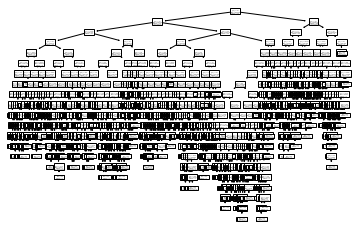

In [94]:
import matplotlib.pyplot as pl
from sklearn import tree
tree.plot_tree(regr)
pl.show()

In [95]:
y_pred=regr.predict(x_test)

In [96]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test,y_pred)
r_score

0.7043072977579359